# Predicting Credit Risk for Loan Applicants

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('german_credit_data.csv')

# Basic Questions

## How big is the data?

In [3]:
df.shape

(1000, 11)

## How does the data look?

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## What is the data type of columns?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


## Is there any null value?

In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## Is there any duplicate value?

In [7]:
df.duplicated().sum()

0

## How does data look mathematically?

In [8]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## How is the correlation between columns?

<Axes: >

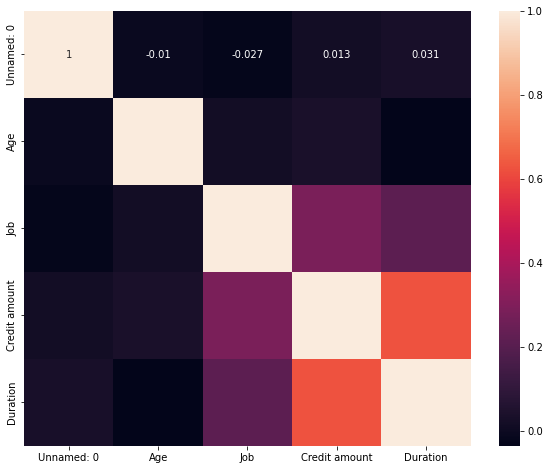

In [10]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax)

# Exploratory Data Analysis

# How many loans are risky, and how many are safe?

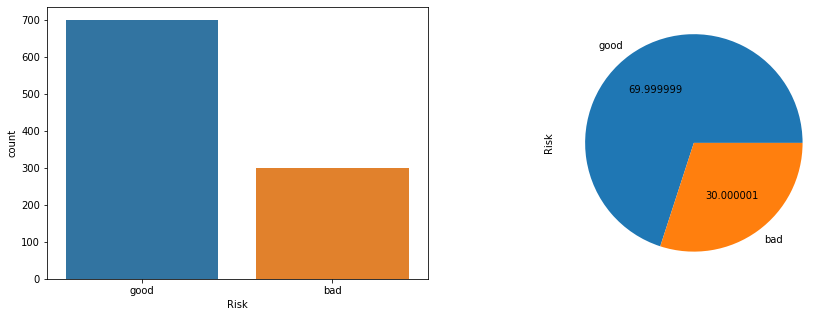

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x="Risk", data=df, ax=ax[0])
df['Risk'].value_counts().plot(kind="pie", autopct="%2f", ax=ax[1])
plt.show()

The dataset appears to be imbalanced but this might also be due to most people tend to pay back their loans

## Applicant gender distribution

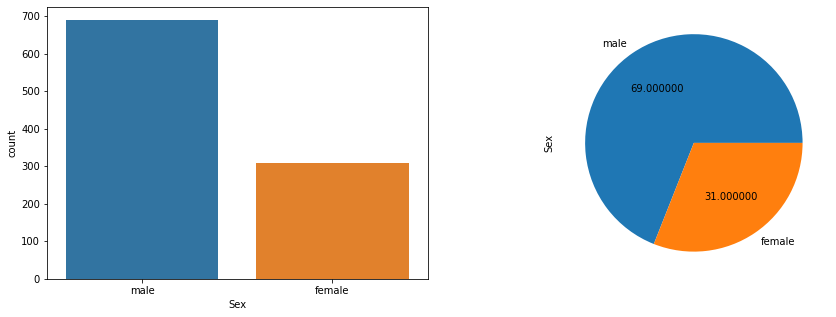

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="Sex", data=df, ax=ax[0])
df['Sex'].value_counts().plot(kind="pie", autopct="%2f", ax=ax[1])
plt.show()

31% female to 69% male ration. It appears on average less females apply for loans compared to men.

## Is risk probability affected by gender?

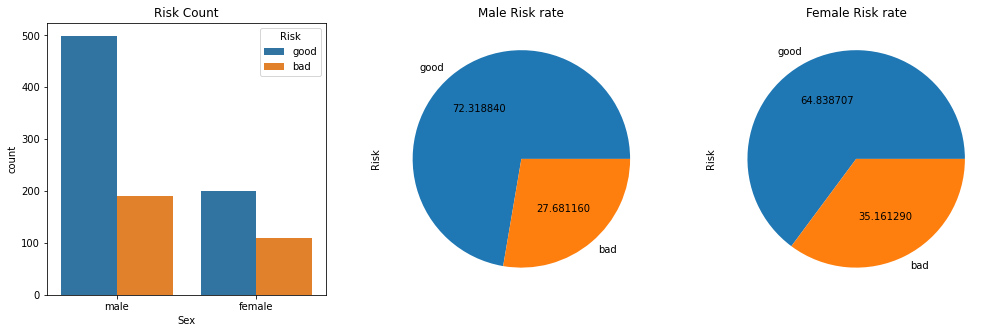

In [13]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
sns.countplot(x="Sex", data=df, hue="Risk", ax=ax[0])
ax[0].set_title('Risk Count')
tf = df[df['Sex']=='male']
tf['Risk'].value_counts().plot(kind='pie', autopct="%2f", ax=ax[1])
ax[1].set_title('Male Risk rate')
tf = df[df['Sex']=='female']
tf['Risk'].value_counts().plot(kind='pie', autopct="%2f", ax=ax[2])
ax[2].set_title('Female Risk rate')
plt.show()

## How is Risk effected by Housing and Purpose?

TypeError: Neither the `x` nor `y` variable appears to be numeric.

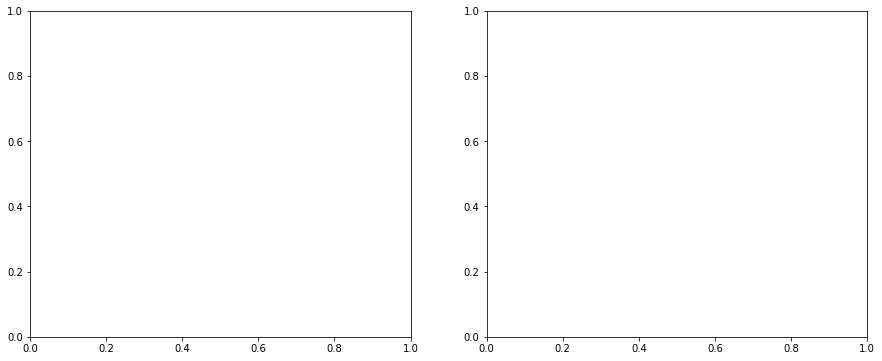

In [14]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
sns.pointplot(x='Housing', y='Risk', hue='Sex', data=df, ax=ax[0])
sns.pointplot(x='Purpose', y='Risk', hue='Sex', data=df, ax=ax[1])
plt.xticks(rotation=45)
plt.show()

clearly rent people are more likely to pay back loans compared to free housing and finally own house people are best

# How does Age and Credit amount affect risk?

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

C:\Users\kumar\AppData\Local\Temp\ipykernel_2236\3248002843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Risk']=='bad']['Age'], hist=False, label='Bad', ax=ax[0])
C:\Users\kumar\AppData\Local\Temp\ipykernel_2236\3248002843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

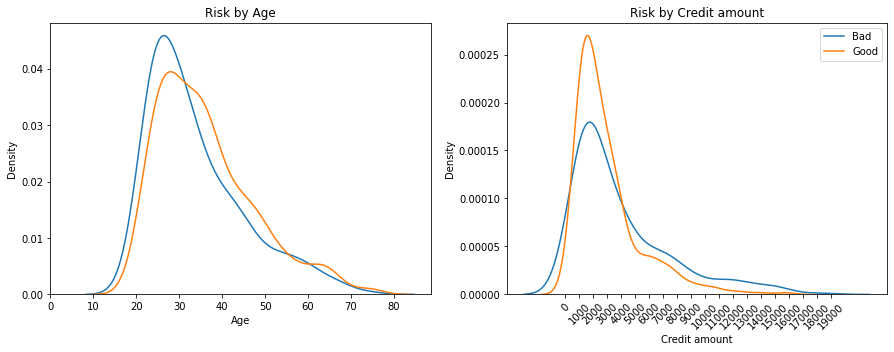

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df[df['Risk']=='bad']['Age'], hist=False, label='Bad', ax=ax[0])
sns.distplot(df[df['Risk']=='good']['Age'], hist=False, label='Good', ax=ax[0])
ax[0].set_title('Risk by Age')
ax[0].set_xticks(range(0,90,10))

sns.distplot(df[df['Risk']=='bad']['Credit amount'], hist=False, label='Bad', ax=ax[1])
sns.distplot(df[df['Risk']=='good']['Credit amount'], hist=False, label='Good', ax=ax[1])
ax[1].set_xticks(range(0,20000,1000))
ax[1].set_title('Risk by Credit amount')

plt.xticks(rotation=45)
plt.legend()
plt.show()

Most people loan applicants are of the age group between 20 to 40, and that makes sense, since children don't earn, and after 40 most people don't require more already have house and car, after 50 signifant drop because no college fees

Most people took loan of amount less than 5000

## How does Job and Duration affect risk?

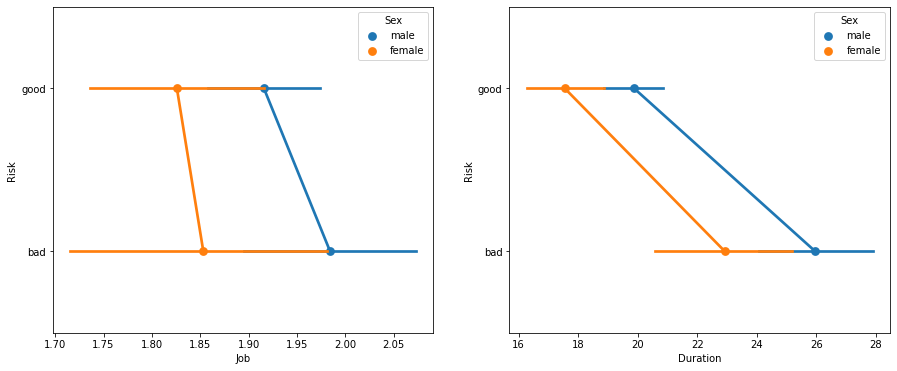

In [16]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
sns.pointplot(x='Job', y='Risk', hue='Sex', data=df, ax=ax[0])
sns.pointplot(x='Duration', y='Risk', hue='Sex', data=df, ax=ax[1])
plt.show()

Interesting correlation, the more skilled a person is the less likely he is to repay the loan amount and similarly longer duration loans have higher failure rates

## QQ plot to check normal distribution

In [17]:
import scipy.stats as stats

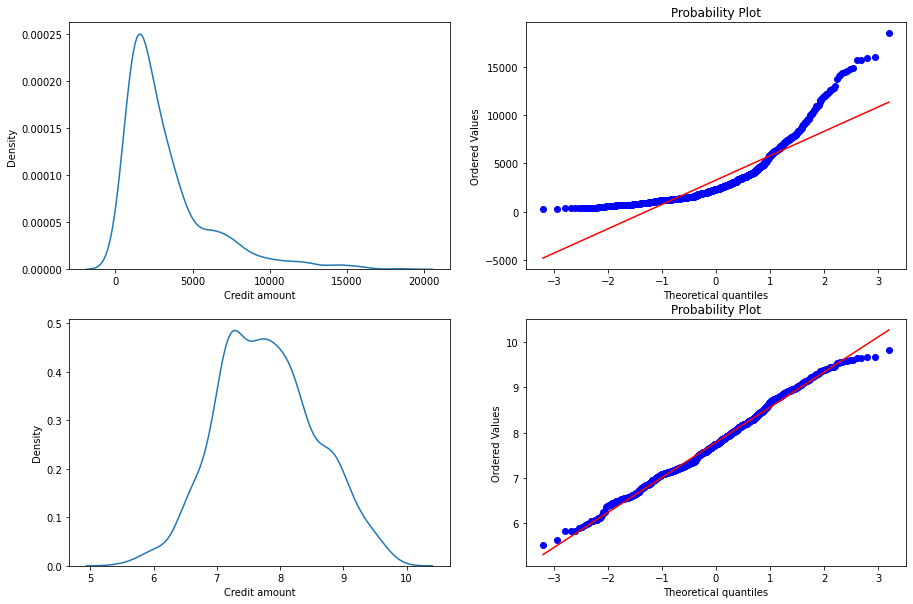

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.kdeplot(df['Credit amount'], ax=ax[0][0])
stats.probplot(df['Credit amount'], dist="norm", plot=ax[0][1])
sns.kdeplot(np.log1p(df['Credit amount']), ax=ax[1][0])
stats.probplot(np.log1p(df['Credit amount']), dist="norm", plot=ax[1][1])
plt.show()

Credit amount is highly skewed but it can be easily fixed using log transformation

# Outliers

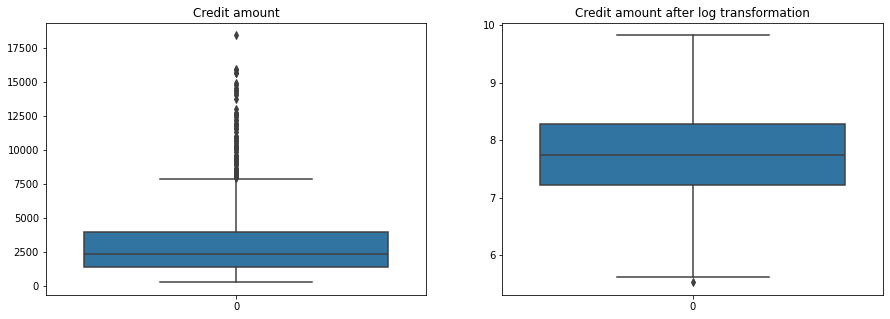

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Credit amount')
sns.boxplot(df['Credit amount'], ax=ax[0])
ax[1].set_title('Credit amount after log transformation')
sns.boxplot(np.log1p(df['Credit amount']), ax=ax[1])
plt.show()

Even the outliers reduces after applying log transformer

# Preprocessing

In [20]:
df = df.drop(df.columns[0], axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [21]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk', axis=1),
                                                    df['Risk'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape

(800, 9)

In [23]:
X_train.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
548,24,female,1,own,little,little,626,12,radio/TV
125,30,male,2,own,little,little,2121,12,car
15,32,female,1,own,moderate,little,1282,24,radio/TV
246,52,male,2,own,little,NaN,717,12,radio/TV
383,26,male,2,own,little,rich,1330,12,car


## Plan

Use log FunctionTransformer on 'Credit amount' to make it normally distributed<br>
Use SimpleImputer on 'Saving accounts' and 'Checking account' to fill missing values<br>
Use OneHotEncoder on 'Sex', 'Housing', 'Saving accounts', 'Checking account' and 'Purpose'<br>
Use StandardScaler on all columns<br>
Pass the data through logistic regression model<br>

## Building Column Transformers

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
#function transformer
tft1 = ColumnTransformer([
    ('log_amount', FunctionTransformer(np.log1p),['Credit amount'])
], remainder='passthrough')

In [26]:
#imputation transformer
tft2 = ColumnTransformer([
    ('impute_saving', SimpleImputer(strategy='most_frequent'),[5]),
    ('impute_checking', SimpleImputer(strategy='most_frequent'),[6])
], remainder='passthrough')

In [29]:
#One hot encoding
tft3 = ColumnTransformer([
    ('ohe_sex_housing_saving_checking_purpose', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'),[0,1,4,6,8])
], remainder='passthrough')

In [30]:
#Scaling transformer
tft4 = ColumnTransformer([
    ('scale', StandardScaler(),slice(0,8))
])

In [31]:
#Model
tft5 = LogisticRegression()

# Building Pipeline

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipe = Pipeline([
    ('tft1', tft1),
    ('tft2', tft2),
    ('tft3', tft3),
    ('tft4', tft4),
    ('tft5', tft5)
])

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tft1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_amount',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Credit amount'])])),
                ('tft2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_saving',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_checking',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('tft3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_housing_saving_checking_purpose',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4, 6, 8])])),
                ('tft4',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('tft5', LogisticRegression())])

## Model evaluation

Accuracy: 0.72
Precision: 0.7171717171717171
Recall: 1.0
F1-score: 0.8352941176470587
AUC-ROC: 0.6665250121418164

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.07        58
           1       0.72      1.00      0.84       142

    accuracy                           0.72       200
   macro avg       0.86      0.52      0.45       200
weighted avg       0.80      0.72      0.61       200



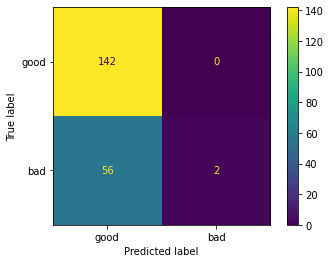

In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluation metrics (no need for pos_label since it's 0/1 now)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# AUC-ROC (works on numeric labels)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 = good, 0 = bad
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['good', 'bad'])
disp.plot()

## Testing if other model can perform better

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Model
tft5 = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # can set max depth to prevent overfitting
    random_state=42,       # for reproducibility
    class_weight='balanced'  # handles class imbalance automatically
)

In [37]:
pipe = Pipeline([
    ('tft1', tft1),
    ('tft2', tft2),
    ('tft3', tft3),
    ('tft4', tft4),
    ('tft5', tft5)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('tft1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_amount',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Credit amount'])])),
                ('tft2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_saving',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5]),
                                                 ('impute_checking',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('tft3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_housing_saving_checking_purpose',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4, 6, 8])])),
                ('tft4',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('tft5',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Accuracy: 0.6
Precision: 0.746031746031746
Recall: 0.6619718309859155
F1-score: 0.7014925373134329
AUC-ROC: 0.6123725109276348

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.45      0.39        58
           1       0.75      0.66      0.70       142

    accuracy                           0.60       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.63      0.60      0.61       200



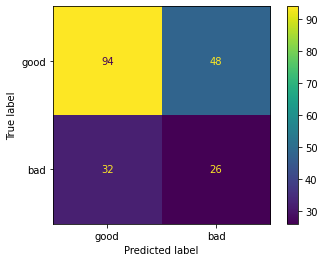

In [38]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluation metrics (no need for pos_label since it's 0/1 now)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# AUC-ROC (works on numeric labels)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 = good, 0 = bad
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['good', 'bad'])
disp.plot()

# Export Model

In [39]:
import pickle

In [40]:
pickle.dump(pipe, open('pipe.pkl','wb'))